In [47]:
import pandas
import matplotlib.pyplot as plt
import scipy.stats as stats

In [48]:
enade2016=pandas.read_csv("MICRODADOS_ENADE_2016.txt", sep=';',dtype={"DS_VT_ESC_OFG": str, 
                                                                               'DS_VT_ESC_OCE':str,
                                                                              'DS_VT_ACE_OCE':str,
                                                                              'NT_GER':str,
                                                                              'NT_FG':str,
                                                                              'NT_OBJ_FG':str,
                                                                              'NT_DIS_FG':str,
                                                                              'NT_CE':str,
                                                                              'NT_OBJ_CE':str,
                                                                              'NT_DIS_CE':str})
enade2016.shape

(216044, 141)

In [49]:
enade2016.columns[0:10]

Index(['NU_ANO', 'CO_IES', 'CO_CATEGAD', 'CO_ORGACAD', 'CO_GRUPO', 'CO_CURSO',
       'CO_MODALIDADE', 'CO_MUNIC_CURSO', 'CO_UF_CURSO', 'CO_REGIAO_CURSO'],
      dtype='object')

In [50]:
enade2016.dropna()

,NU_ANO,CO_IES,CO_CATEGAD,CO_ORGACAD,CO_GRUPO,CO_CURSO,CO_MODALIDADE,CO_MUNIC_CURSO,CO_UF_CURSO,CO_REGIAO_CURSO,...,QE_I59,QE_I60,QE_I61,QE_I62,QE_I63,QE_I64,QE_I65,QE_I66,QE_I67,QE_I68
1,2016,1,10002,10028,38,7,1,5103403,51,5,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
2,2016,1,10002,10028,38,7,1,5103403,51,5,...,4.0,1.0,5.0,7.0,7.0,5.0,4.0,7.0,5.0,5.0
3,2016,1,10002,10028,38,7,1,5103403,51,5,...,4.0,4.0,4.0,3.0,5.0,4.0,4.0,6.0,6.0,4.0
4,2016,1,10002,10028,38,7,1,5103403,51,5,...,6.0,2.0,4.0,5.0,5.0,3.0,2.0,6.0,4.0,5.0
5,2016,1,10002,10028,38,7,1,5103403,51,5,...,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,2.0
6,2016,1,10002,10028,38,7,1,5103403,51,5,...,6.0,6.0,5.0,5.0,5.0,6.0,6.0,6.0,4.0,6.0
7,2016,1,10002,10028,38,7,1,5103403,51,5,...,5.0,8.0,6.0,6.0,6.0,5.0,5.0,5.0,6.0,3.0
8,2016,1,10002,10028,38,7,1,5103403,51,5,...,2.0,1.0,4.0,2.0,2.0,4.0,3.0,6.0,2.0,5.0
9,2016,1,10002,10028,38,7,1,5103403,51,5,...,3.0,1.0,2.0,1.0,1.0,4.0,8.0,4.0,1.0,2.0
10,2016,1,10002,10028,38,7,1,5103403,51,5,...,4.0,4.0,3.0,3.0,5.0,4.0,4.0,6.0,3.0,5.0


In [51]:
tabela16 = pandas.DataFrame(enade2016, columns=['NT_GER', 'CO_CATEGAD', 'CO_UF_CURSO', 'QE_I08', 'QE_I10'])
tabela16.dropna()
tabela16.head(10)

,NT_GER,CO_CATEGAD,CO_UF_CURSO,QE_I08,QE_I10
0,NaN,10002,51,C,D
1,52.6,10002,51,A,A
2,83.6,10002,51,B,B
3,43.6,10002,51,A,A
4,72.8,10002,51,B,A
5,38.8,10002,51,D,D
6,67.2,10002,51,C,A
7,28.8,10002,51,A,A
8,56,10002,51,B,D
9,53.4,10002,51,B,A


In [52]:
tabela16['NT_GER'] = tabela16['NT_GER'].str.replace(',', '.')
tabela16=tabela16.loc[(tabela16['NT_GER'].notnull())]
tabela16['NT_GER'] = pandas.to_numeric(tabela16['NT_GER'])
tabela16.head()

,NT_GER,CO_CATEGAD,CO_UF_CURSO,QE_I08,QE_I10
1,52.6,10002,51,A,A
2,83.6,10002,51,B,B
3,43.6,10002,51,A,A
4,72.8,10002,51,B,A
5,38.8,10002,51,D,D


In [53]:
tabela16=tabela16.loc[(tabela16['QE_I08'].notnull())]
tabela16=tabela16.loc[(tabela16['QE_I10'].notnull())]

tabela16['QE_I08'] = tabela16['QE_I08'].map({'A': 1, 'B': 2, 'C': 3, 'D': 4,'E': 5, 'F':6,'G':7})
tabela16['QE_I10'] = tabela16['QE_I10'].map({'A': 1, 'B': 2, 'C': 3, 'D': 4,'E': 5})
tabela16.head()

,NT_GER,CO_CATEGAD,CO_UF_CURSO,QE_I08,QE_I10
1,52.6,10002,51,1,1
2,83.6,10002,51,2,2
3,43.6,10002,51,1,1
4,72.8,10002,51,2,1
5,38.8,10002,51,4,4


In [54]:
tabela16['NT_GER'].mean()

47.16883271687343

In [55]:
tabela16['NT_GER'].describe()

count    195471.000000
mean         47.168833
std          15.048214
min           0.000000
25%          36.200000
50%          46.900000
75%          58.100000
max          93.200000
Name: NT_GER, dtype: float64

In [56]:
print('indice da primeira maior nota 2016: ', tabela16['NT_GER'].idxmax())
print('Maior nota: ', tabela16['NT_GER'][65555])
#print(tabela['NT_GER'].idxmax())

indice da primeira maior nota 2016:  65555
Maior nota:  93.2


In [57]:
#UF16 = tabela16

In [58]:
#UF16['NT_GER'].describe()

In [59]:
#CATEGORIA DA UNIVERSIDADE
#2016
#Pública = 1
#Privada = 2

'''
tabela16 = tabela16.loc[(tabela16['CO_CATEGAD'].notnull())]
tabela16['CO_CATEGAD'] = tabela16['CO_CATEGAD'].map({93:1, 115:1, 116:1, 118:2, 121:2, 10001:1, 10002:1, 10003:1,
                                                  10004:2,10005:2,10006:2,10007:2,10008:2,10009:2})
'''                                                                                                    

#UF16 = tabela16[tabela16['CO_UF_CURSO']==31]
tabela16 = tabela16.loc[(tabela16['CO_CATEGAD'].notnull())]
tabela16['CO_CATEGAD'] = tabela16['CO_CATEGAD'].map({93: 1, 115:1, 116:1, 118:2, 121:2, 10001:1, 10002:1, 10003:1,
                                                    10004:2,10005:2,10006:2,10007:2,10008:2,10009:2})

CAT16Pub = tabela16[tabela16['CO_CATEGAD']==1]
CAT16Pub.describe()

,NT_GER,CO_CATEGAD,CO_UF_CURSO,QE_I08,QE_I10
count,45377.000000,45377.0,45377.000000,45377.000000,45377.000000
mean,55.082663,1.0,32.808626,3.144324,1.673072
std,14.733597,0.0,9.890274,1.659985,1.300166
min,0.000000,1.0,11.000000,1.000000,1.000000
25%,45.600000,1.0,26.000000,2.000000,1.000000
50%,56.400000,1.0,31.000000,3.000000,1.000000
75%,65.900000,1.0,41.000000,4.000000,2.000000
max,92.200000,1.0,53.000000,7.000000,5.000000


In [60]:
#universidades privadas
CAT16Priv = tabela16[tabela16['CO_CATEGAD']==2]
CAT16Priv.describe()

,NT_GER,CO_CATEGAD,CO_UF_CURSO,QE_I08,QE_I10
count,150094.000000,150094.0,150094.000000,150094.000000,150094.000000
mean,44.776293,2.0,33.538109,2.805668,2.503691
std,14.304698,0.0,9.357165,1.543188,1.721364
min,0.000000,2.0,11.000000,1.000000,1.000000
25%,34.400000,2.0,29.000000,2.000000,1.000000
50%,44.200000,2.0,35.000000,2.000000,1.000000
75%,54.700000,2.0,41.000000,4.000000,4.000000
max,93.200000,2.0,53.000000,7.000000,5.000000


In [61]:
#Privada 2016
#somente as notas de quem respondeu a questão sobre a renda
CAT16Priv=CAT16Priv.loc[(CAT16Priv['QE_I08'].notnull())]
CAT16Priv.NT_GER.describe()

count    150094.000000
mean         44.776293
std          14.304698
min           0.000000
25%          34.400000
50%          44.200000
75%          54.700000
max          93.200000
Name: NT_GER, dtype: float64

In [62]:
#Privada 2016
#somente as notas de quem respondeu a questão sobre a situacao de trabalho
CAT16Priv=CAT16Priv.loc[(CAT16Priv['QE_I10'].notnull())]
CAT16Priv.NT_GER.describe()

count    150094.000000
mean         44.776293
std          14.304698
min           0.000000
25%          34.400000
50%          44.200000
75%          54.700000
max          93.200000
Name: NT_GER, dtype: float64

In [63]:
CAT16Priv.QE_I08.head(10)

2512    4
2513    3
2514    1
2515    1
2517    2
2518    1
2519    1
2520    2
2521    3
2522    5
Name: QE_I08, dtype: int64

In [64]:
CAT16Priv.QE_I10.head(10)

2512    1
2513    1
2514    5
2515    1
2517    1
2518    5
2519    1
2520    1
2521    1
2522    1
Name: QE_I10, dtype: int64

In [65]:
#somente as notas de quem respondeu a questão sobre a situação de trabalho
#2016 publica
CAT16Pub=CAT16Pub.loc[(CAT16Pub['QE_I10'].notnull())]
CAT16Pub.NT_GER.describe()

count    45377.000000
mean        55.082663
std         14.733597
min          0.000000
25%         45.600000
50%         56.400000
75%         65.900000
max         92.200000
Name: NT_GER, dtype: float64

In [66]:
#somente as notas de quem respondeu a questão sobre a renda
CAT16Pub=CAT16Pub.loc[(CAT16Pub['QE_I08'].notnull())]
CAT16Pub.NT_GER.describe()

count    45377.000000
mean        55.082663
std         14.733597
min          0.000000
25%         45.600000
50%         56.400000
75%         65.900000
max         92.200000
Name: NT_GER, dtype: float64

In [67]:
CAT16Pub.QE_I08.head(10)

1     1
2     2
3     1
4     2
5     4
6     3
7     1
8     2
9     2
10    3
Name: QE_I08, dtype: int64

In [68]:
CAT16Pub.QE_I10.head(10)

1     1
2     2
3     1
4     1
5     4
6     1
7     1
8     4
9     1
10    4
Name: QE_I10, dtype: int64

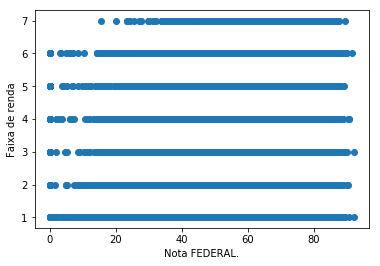

In [69]:
import matplotlib.pyplot as plt
#visualmente
plt.scatter( CAT16Pub.NT_GER, CAT16Pub.QE_I08)
plt.ylabel('Faixa de renda')
plt.xlabel('Nota FEDERAL.')
plt.show()

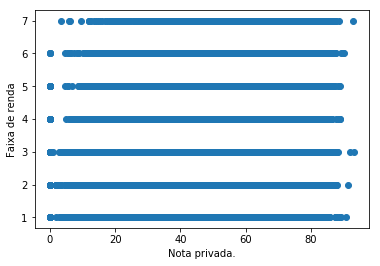

In [70]:
import matplotlib.pyplot as plt
#visualmente
plt.scatter( CAT16Priv.NT_GER, CAT16Priv.QE_I08)
plt.ylabel('Faixa de renda')
plt.xlabel('Nota privada.')
plt.show()

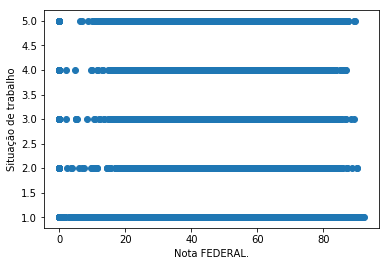

In [71]:
import matplotlib.pyplot as plt
#visualmente
plt.scatter( CAT16Pub.NT_GER, CAT16Pub.QE_I10)
plt.ylabel('Situação de trabalho')
plt.xlabel('Nota FEDERAL.')
plt.show()

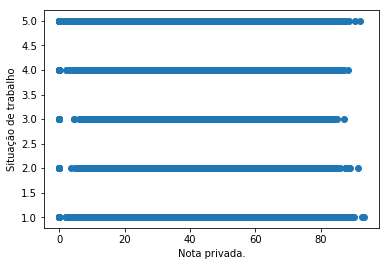

In [72]:
import matplotlib.pyplot as plt
#visualmente
plt.scatter( CAT16Priv.NT_GER, CAT16Priv.QE_I10)
plt.ylabel('Situação de trabalho')
plt.xlabel('Nota privada.')
plt.show()

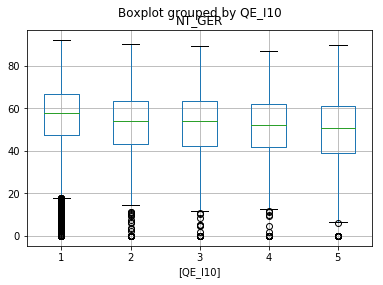

In [73]:
pub10 = pandas.DataFrame(CAT16Pub, columns=['NT_GER', 'QE_I10'])
pub10.boxplot(by='QE_I10')

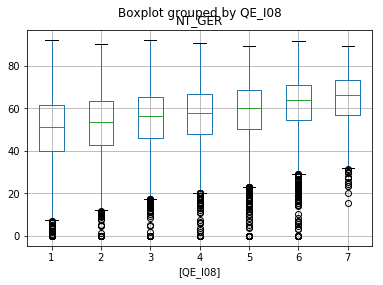

In [74]:
pub08 = pandas.DataFrame(CAT16Pub, columns=['NT_GER', 'QE_I08'])
pub08.boxplot(by='QE_I08')

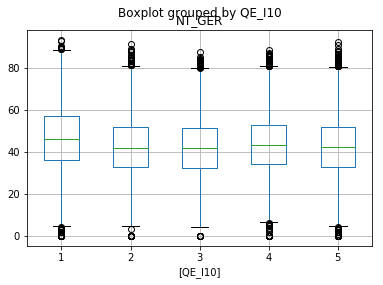

In [75]:
priv10 = pandas.DataFrame(CAT16Priv, columns=['NT_GER', 'QE_I10'])
#priv10.head(10)
#qe22.boxplot(by='QE_I10')
priv10.boxplot(by='QE_I10')

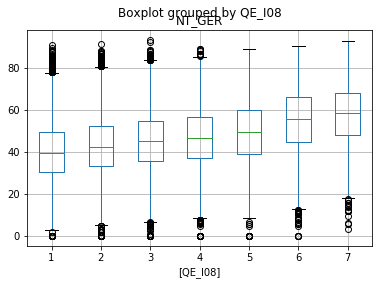

In [76]:
priv08 = pandas.DataFrame(CAT16Priv, columns=['NT_GER', 'QE_I08'])
priv08.boxplot(by='QE_I08')

In [77]:
'''DOS ESTUDANTES DE ESCOLA PÚBLICA QUE TRABALHAM >=40 HORAS POR SEMANA '''
trabalhopub1=pub10.loc[pub10.QE_I10 ==5]
print(trabalhopub1.NT_GER.describe())


count    4103.000000
mean       49.826615
std        15.624053
min         0.000000
25%        39.200000
50%        50.600000
75%        61.100000
max        89.500000
Name: NT_GER, dtype: float64


In [78]:
'''DOS ESTUDANTES DE ESCOLA PÚBLICA QUE NAO TRABALHAM '''
trabalhopub2=pub10.loc[pub10.QE_I10 ==1]
print(trabalhopub2.NT_GER.describe())

count    33683.000000
mean        56.370139
std         14.331515
min          0.000000
25%         47.300000
50%         57.800000
75%         66.900000
max         92.200000
Name: NT_GER, dtype: float64


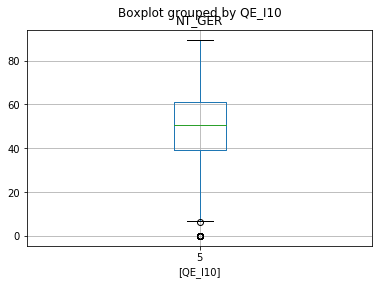

In [79]:
#40 horas
a=pandas.DataFrame(trabalhopub1, columns=['NT_GER', 'QE_I10'])
a.boxplot(by='QE_I10')

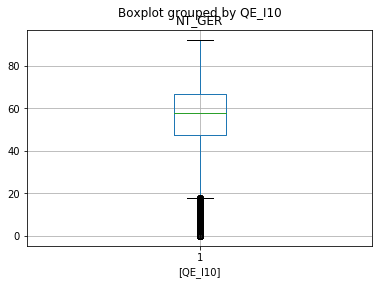

In [80]:
#não trabalham
a=pandas.DataFrame(trabalhopub2, columns=['NT_GER', 'QE_I10'])
a.boxplot(by='QE_I10')

In [81]:
'''DOS ESTUDANTES DE ESCOLA PRIVADA QUE NAO TRABALHAM '''
trabalhopriv=priv10.loc[priv10.QE_I10 ==1]
print(trabalhopriv.NT_GER.describe())

count    76508.000000
mean        46.704584
std         14.672555
min          0.000000
25%         36.100000
50%         46.200000
75%         57.200000
max         93.200000
Name: NT_GER, dtype: float64


In [82]:
'''DOS ESTUDANTES DE ESCOLA PRIVADA QUE TRABALHAM >=40 HORAS POR SEMANA '''
trabalhopriv1=priv10.loc[priv10.QE_I10 ==5]
print(trabalhopriv1.NT_GER.describe())

count    37022.000000
mean        42.570129
std         13.592123
min          0.000000
25%         32.900000
50%         42.050000
75%         51.900000
max         92.000000
Name: NT_GER, dtype: float64


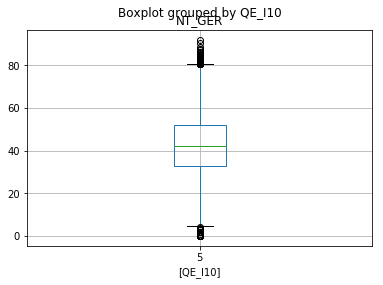

In [83]:
#40 horas
b=pandas.DataFrame(trabalhopriv1, columns=['NT_GER', 'QE_I10'])
b.boxplot(by='QE_I10')

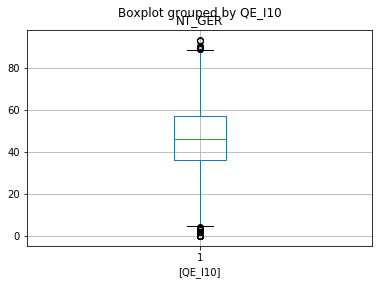

In [84]:
#não trabalham
a=pandas.DataFrame(trabalhopriv, columns=['NT_GER', 'QE_I10'])
a.boxplot(by='QE_I10')

In [91]:
""" DOS ESTUDANTES DE ESCOLA PUBLICA COM A RENDA DE ATÉ 1,5 SALÁRIO MINIMO"""
rendapub1=pub08.loc[pub08.QE_I08 ==1]
print(rendapub1.NT_GER.describe())

count    8384.000000
mean       50.291162
std        15.146753
min         0.000000
25%        39.775000
50%        51.000000
75%        61.400000
max        92.200000
Name: NT_GER, dtype: float64


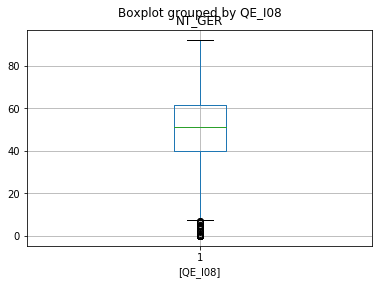

In [92]:
a=pandas.DataFrame(rendapub1, columns=['NT_GER', 'QE_I08'])
a.boxplot(by='QE_I08')

In [100]:
""" DOS ESTUDANTES DE ESCOLA PUBLICA COM A RENDA DE 10 a 30 SALÁRIOS MINIMOS"""
rendapub=pub08.loc[pub08.QE_I08 == 6]
print(rendapub.NT_GER.describe())

count    4407.00000
mean       61.83145
std        13.02878
min         0.00000
25%        54.30000
50%        63.80000
75%        71.00000
max        91.50000
Name: NT_GER, dtype: float64


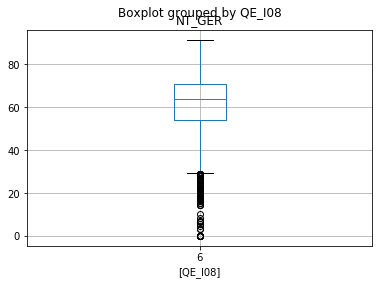

In [101]:
a=pandas.DataFrame(rendapub, columns=['NT_GER', 'QE_I08'])
a.boxplot(by='QE_I08')

In [104]:
""" DOS ESTUDANTES DE ESCOLA PRIVADA COM A RENDA DE ATÉ 1,5 SALÁRIO MINIMO"""
rendapriv1=priv08.loc[priv08.QE_I08 ==1]
print(rendapriv1.NT_GER.describe())

count    32295.000000
mean        40.224700
std         13.636072
min          0.000000
25%         30.400000
50%         39.400000
75%         49.300000
max         90.600000
Name: NT_GER, dtype: float64


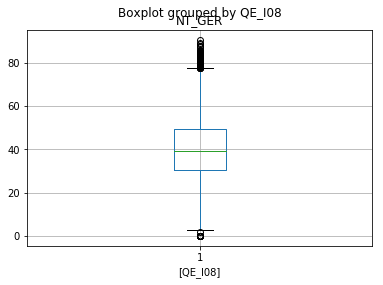

In [105]:
a=pandas.DataFrame(rendapriv1, columns=['NT_GER', 'QE_I08'])
a.boxplot(by='QE_I08')

In [106]:
""" DOS ESTUDANTES DE ESCOLA PRIVADA COM A RENDA DE 10 a 30 SALÁRIOS MINIMOS"""
rendapriv=priv08.loc[priv08.QE_I08 == 6]
print(rendapriv.NT_GER.describe())

count    9060.000000
mean       54.715949
std        14.484094
min         0.000000
25%        44.600000
50%        55.700000
75%        65.900000
max        90.100000
Name: NT_GER, dtype: float64


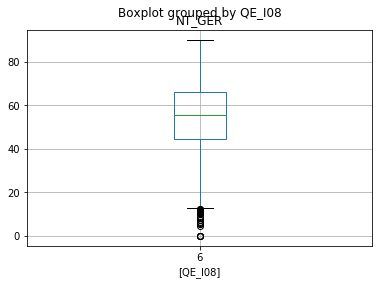

In [107]:
a=pandas.DataFrame(rendapriv, columns=['NT_GER', 'QE_I08'])
a.boxplot(by='QE_I08')